<a href="https://colab.research.google.com/github/Onion-Ninja/world-coin-iris-recognition/blob/main/casiaV1_wc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install onnx onnxruntime pydantic==1.10.16 huggingface-hub pyyaml
!pip install --no-deps open-iris

In [2]:
import iris

print(iris.__version__)

1.9.7


/mnt/oldhome/nishkal/dd/iris-code/.conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Upload CASIA.zip
# Unzip CASIA V1
# !unzip -q /content/CASIA1.zip

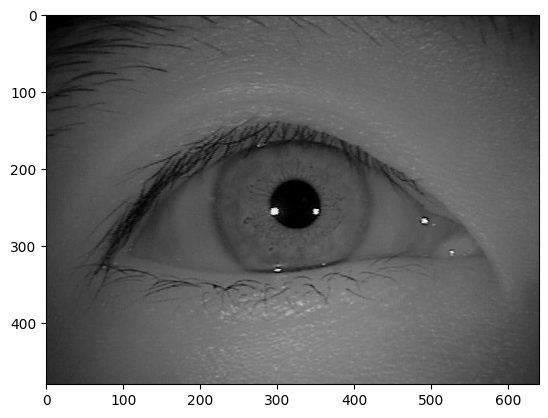

In [7]:
import cv2
import os
import matplotlib.pyplot as plt
path = "/home/nishkal/datasets/iris_db/CASIA_iris_thousand/orig/1_L/1_L_1.jpg"
# full_path = os.path.expanduser(raw_path)
img_pixels = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img_pixels, cmap='gray')

In [8]:
iris_pipeline = iris.IRISPipeline()
output = iris_pipeline(iris.IRImage(img_data=img_pixels, image_id="image_id", eye_side="right"))
output.keys()

dict_keys(['error', 'iris_template', 'metadata'])

In [9]:
# Verify IRISPipeline inference call finished without any exception being raised
output["error"] is None

True

In [10]:
"""Available fields in `output["iris_template"]` are: """ + str(output["iris_template"].__fields__)

'Available fields in `output["iris_template"]` are: {\'iris_codes\': ModelField(name=\'iris_codes\', type=List[ndarray], required=True), \'mask_codes\': ModelField(name=\'mask_codes\', type=List[ndarray], required=True), \'iris_code_version\': ModelField(name=\'iris_code_version\', type=str, required=True)}'

In [11]:
num_codes = len(output["iris_template"].iris_codes)
code_shape = output["iris_template"].iris_codes[0].shape

f"""Number of returned iris codes is equal to {num_codes} and each code shape is {code_shape}"""

'Number of returned iris codes is equal to 2 and each code shape is (16, 256, 2)'

In [12]:
output["metadata"]

{'iris_version': '1.9.7',
 'image_id': 'image_id',
 'image_size': (640, 480),
 'eye_side': 'right',
 'eye_centers': {'iris_center': (319.08591208193917, 246.30407789937422),
  'pupil_center': (323.6538932168168, 247.21033909687407)},
 'pupil_to_iris_property': {'pupil_to_iris_diameter_ratio': 0.30876262936880294,
  'pupil_to_iris_center_dist_ratio': np.float64(0.044088363687177654)},
 'offgaze_score': 0.0005998579420957642,
 'eye_orientation': np.float64(0.002697198924616284),
 'occlusion90': np.float64(0.8170766819156083),
 'occlusion30': np.float64(0.9813867176516898),
 'iris_bbox': {'x_min': 216.33090209960938,
  'y_min': 139.8771514892578,
  'x_max': 422.73876953125,
  'y_max': 350.87841796875},
 'sharpness_score': 1350.1932373046875}

## Debug Env

In [13]:
iris_pipeline = iris.IRISPipeline(env=iris.IRISPipeline.DEBUGGING_ENVIRONMENT)

output = iris_pipeline(iris.IRImage(img_data=img_pixels, image_id="image_id", eye_side="right"))

In [14]:
output.keys()

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])

In [15]:
iris_visualizer = iris.visualisation.IRISVisualizer()

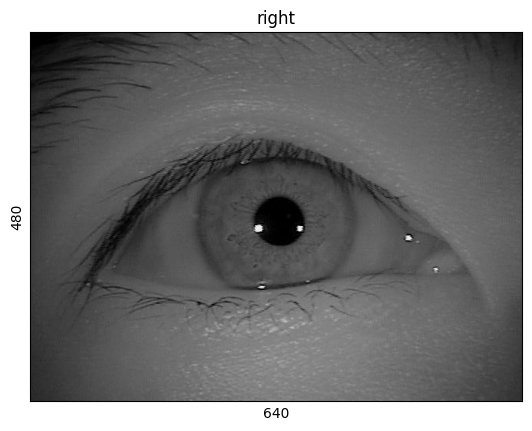

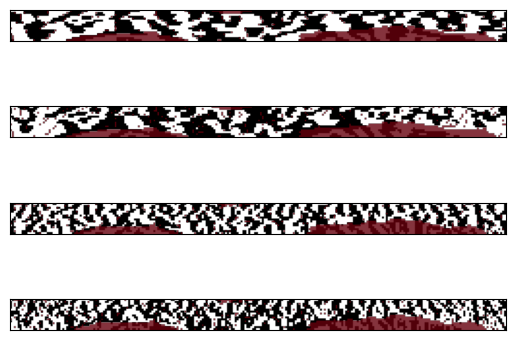

In [16]:
import matplotlib.pyplot as plt

canvas = iris_visualizer.plot_ir_image(iris.IRImage(img_data=img_pixels, eye_side="right"))
plt.show()

canvas = iris_visualizer.plot_iris_template(output["iris_template"])
plt.show()

In [17]:
iris_pipeline.call_trace['segmentation']

SegmentationMap(predictions=array([[[5.9604645e-08, 2.2947788e-06, 8.9406967e-08, 4.7385693e-06],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 8.9406967e-08],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.9604645e-08],
        [1.5199184e-06, 4.7683716e-07, 0.0000000e+00, 1.4072657e-04]],

       [[0.0000000e+00, 1.1920929e-07, 0.0000000e+00, 1.1920929e-07],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 7.1525574e-07]],

       [[0.0000000e+00, 1.1920929e-07, 0.0000000e+00, 1.1920929e-07],
        [0.0000000e+00, 0.000000

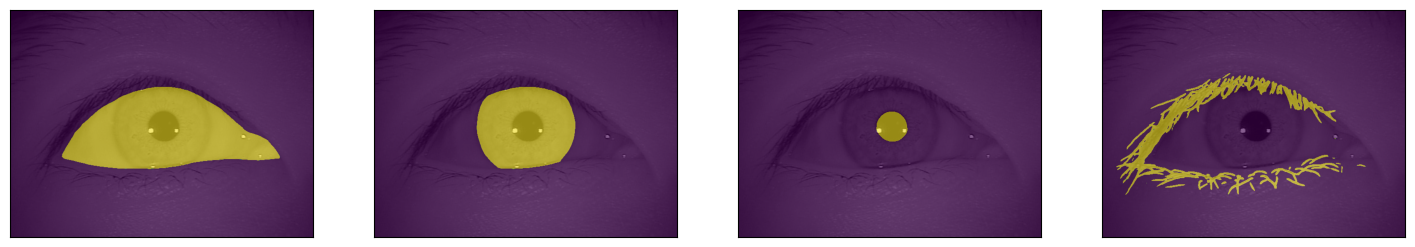

In [18]:
canvas = iris_visualizer.plot_segmentation_map(
    ir_image=iris.IRImage(img_data=img_pixels, eye_side="right"),
    segmap=iris_pipeline.call_trace['segmentation'],
)
plt.show()

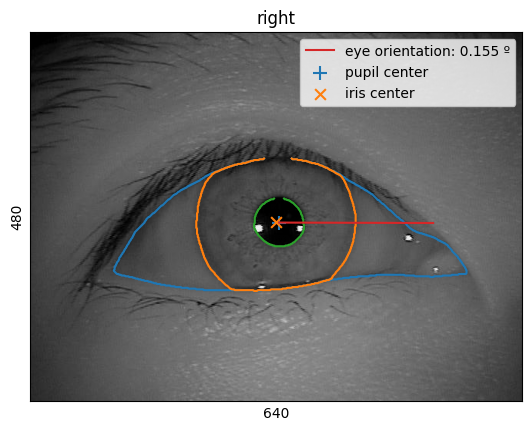

In [19]:
canvas = iris_visualizer.plot_all_geometry(
    ir_image=iris.IRImage(img_data=img_pixels, eye_side="right"),
    geometry_polygons=iris_pipeline.call_trace['vectorization'],
    eye_orientation=iris_pipeline.call_trace['eye_orientation'],
    eye_center=iris_pipeline.call_trace['eye_center_estimation'],
)
plt.show()

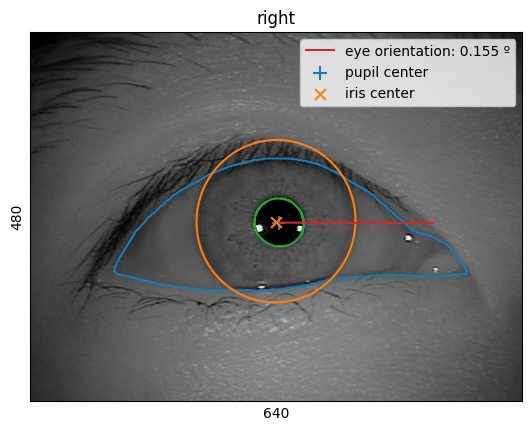

In [20]:
canvas = iris_visualizer.plot_all_geometry(
    ir_image=iris.IRImage(img_data=img_pixels, eye_side="right"),
    geometry_polygons=iris_pipeline.call_trace['geometry_estimation'],
    eye_orientation=iris_pipeline.call_trace['eye_orientation'],
    eye_center=iris_pipeline.call_trace['eye_center_estimation'],
)
plt.show()

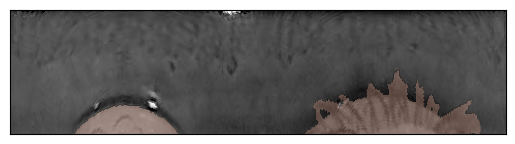

In [21]:
canvas = iris_visualizer.plot_normalized_iris(
    normalized_iris=iris_pipeline.call_trace['normalization'],
)
plt.show()

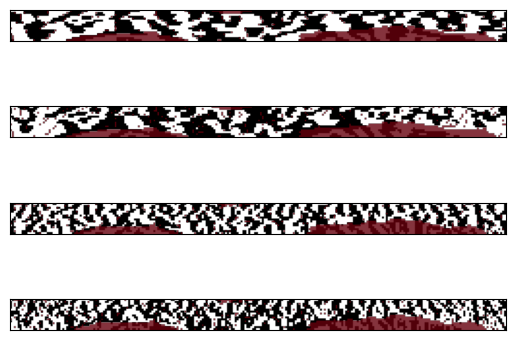

In [22]:
canvas = iris_visualizer.plot_iris_template(
    iris_template=iris_pipeline.call_trace['encoder'],
)
plt.show()

# CASIA V1 Dataset

In [23]:
import re
import os

def scan_single_dataset(dataset_root):
    """
    Scans ONLY ONE dataset (e.g., CASIA_v1).
    
    Expected structure:
        dataset_root/
        ├── orig/
        │   └── user_eye/
        │       └── user_eye_imageNo.ext

    Returns:
        all_files: list of metadata dicts
        user_ids: sorted list of user IDs
    """
    orig_path = os.path.join(dataset_root, "orig")
    if not os.path.isdir(orig_path):
        raise ValueError(f"'orig' folder not found in {dataset_root}")

    dataset_name = os.path.basename(dataset_root)

    all_files = []
    user_ids = set()

    for root, _, files in os.walk(orig_path):
        folder = os.path.basename(root)

        # Folder format: user_eye (e.g., 1_L)
        match_folder = re.match(r"(\d+)_([LR])", folder, re.IGNORECASE)
        if not match_folder:
            continue

        user_id, eye_side = match_folder.groups()

        for f in files:
            if not f.lower().endswith((".bmp", ".jpg", ".jpeg", ".png")):
                continue

            # Filename format: user_eye_imageNo.ext
            name, _ = os.path.splitext(f)
            match_file = re.match(r"\d+_[LR]_(\d+)", name, re.IGNORECASE)
            if not match_file:
                continue

            image_number = match_file.group(1)

            meta = {
                "dataset": dataset_name,
                "user_id": user_id,
                "eye_side": eye_side.upper(),
                "image_number": image_number,
                "session_number": "1",
                "filepath": os.path.join(root, f)
            }

            all_files.append(meta)
            user_ids.add(user_id)

    return all_files, sorted(user_ids)


In [33]:
home = "/home/nishkal/datasets/iris_db/"
cv1 = os.path.join(home, "CASIA_v1/")
cvt = os.path.join(home, "CASIA_iris_thousand/")
iitd = os.path.join(home, "IITD_v1/")

allfiles, user_ids = scan_single_dataset(iitd)
print(len(allfiles))
print(len(user_ids))

2240
224


In [34]:
def ensure_dir(path):
    if not os.path.exists(path):
        os.makedirs(path, exist_ok=True)

In [ ]:
from tqdm import tqdm
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

def pipeline(
    dataset_root,
    save_visuals=True,
    save_intermediates=True
):
    """
    Runs iris pipeline on ONE standardized dataset.
    Reuses a single initialized IRISPipeline instance.
    Preserves directory structure from orig/.
    """

    print(f"\n=== Processing Dataset: {os.path.basename(dataset_root)} ===")

    # -------------------- SCAN DATASET --------------------
    files, user_ids = scan_single_dataset(dataset_root)
    print(f"Found {len(files)} images | {len(user_ids)} users")

    if not files:
        print("No valid images found. Exiting.")
        return

    # -------------------- PATHS --------------------
    orig_root = os.path.join(dataset_root, "orig")

    vis_root = os.path.join(dataset_root, "worldcoin_outputs_images")
    npz_root = os.path.join(dataset_root, "worldcoin_outputs_npz")

    seg_vis_dir  = os.path.join(vis_root, "segmentation")
    norm_vis_dir = os.path.join(vis_root, "normalized")
    code_vis_dir = os.path.join(vis_root, "codes")

    temp_npz_dir = os.path.join(npz_root, "templates")
    seg_npz_dir  = os.path.join(npz_root, "segmentation")
    norm_npz_dir = os.path.join(npz_root, "normalized")

    if save_visuals:
        ensure_dir(seg_vis_dir)
        ensure_dir(norm_vis_dir)
        ensure_dir(code_vis_dir)

    if save_intermediates:
        ensure_dir(temp_npz_dir)
        ensure_dir(seg_npz_dir)
        ensure_dir(norm_npz_dir)

    # -------------------- INIT MACHINE ONCE --------------------
    print("Initializing IRIS Pipeline")
    iris_pipeline = iris.IRISPipeline(
        env=iris.IRISPipeline.DEBUGGING_ENVIRONMENT
    )

    iris_visualizer = iris.visualisation.IRISVisualizer()

    # -------------------- MAIN LOOP --------------------
    for meta in tqdm(files, desc="Processing iris images"):
        img_path = meta["filepath"]

        rel_path = os.path.relpath(img_path, orig_root)
        rel_dir  = os.path.dirname(rel_path)

        unique_name = f"{meta['user_id']}_{meta['eye_side']}_{meta['image_number']}"
        print("Processing:", unique_name, flush=True)

        try:
            # iris_pipeline.call_trace.clear()

            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                raise IOError("Image could not be read")

            eye = "left" if meta["eye_side"].lower() == "l" else "right"

            iris_image = iris.IRImage(
                img_data=image,
                image_id=unique_name,
                eye_side=eye
            )

            output = iris_pipeline(iris_image)
            print(output.keys())
            # ---------------- SAVE INTERMEDIATES ----------------
            if save_intermediates:
                temp_npz_subdir = os.path.join(temp_npz_dir, rel_dir)
                seg_npz_subdir  = os.path.join(seg_npz_dir, rel_dir)
                norm_npz_subdir = os.path.join(norm_npz_dir, rel_dir)

                ensure_dir(temp_npz_subdir)
                ensure_dir(seg_npz_subdir)
                ensure_dir(norm_npz_subdir)

                # print("this")
                seg_arr = iris_pipeline.call_trace.get('segmentation', None)
                if seg_arr is not None:
                    temp_path = os.path.join(seg_npz_dir, f"{unique_name}_seg.npz")
                    np.savez_compressed(temp_path, segmentation=seg_arr)
                    print("saved seg")

                
                print("saving norm")
                norm_arr = iris_pipeline.call_trace.get('normalization', None)
                if norm_arr is not None:  
                    np.savez_compressed(
                        os.path.join(norm_npz_subdir, f"{unique_name}_norm.npz"),
                        normalization=norm_arr
                    )
                    print("saved norm")

                iris_code = output["iris_template"].iris_codes[0]
                mask_code = output["iris_template"].iris_codes[1]

                np.savez_compressed(
                    os.path.join(temp_npz_subdir, f"{unique_name}.npz"),
                    iris_code=iris_code,
                    mask_code=mask_code
                )
                print("saved templates")

            # ---------------- SAVE VISUALS ----------------
            if save_visuals:
                seg_vis_subdir  = os.path.join(seg_vis_dir, rel_dir)
                norm_vis_subdir = os.path.join(norm_vis_dir, rel_dir)
                code_vis_subdir = os.path.join(code_vis_dir, rel_dir)

                ensure_dir(seg_vis_subdir)
                ensure_dir(norm_vis_subdir)
                ensure_dir(code_vis_subdir)

                canvas = iris_visualizer.plot_segmentation_map(
                    ir_image=iris.IRImage(img_data=image, eye_side=eye),
                    segmap=iris_pipeline.call_trace["segmentation"]
                )
                plt.savefig(
                    os.path.join(seg_vis_subdir, f"{unique_name}_seg.jpg"),
                    bbox_inches="tight"
                )
                plt.close("all")

                canvas = iris_visualizer.plot_normalized_iris(
                    normalized_iris=iris_pipeline.call_trace["normalization"]
                )
                plt.savefig(
                    os.path.join(norm_vis_subdir, f"{unique_name}_norm.jpg"),
                    bbox_inches="tight",
                    pad_inches=0
                )
                plt.close("all")

                canvas = iris_visualizer.plot_iris_template(
                    iris_template=iris_pipeline.call_trace["encoder"]
                )
                plt.savefig(
                    os.path.join(code_vis_subdir, f"{unique_name}_code.jpg"),
                    bbox_inches="tight"
                )
                plt.close("all")

        except Exception as e:
            print(f"[ERROR] {img_path}: {e}")


In [ ]:
pipeline(cv1)


=== Processing Dataset:  ===
Found 756 images | 108 users
Initializing IRIS Pipeline


Processing iris images:   0%|          | 0/756 [00:00<?, ?it/s]

Processing: 48_L_7


Processing iris images:   0%|          | 1/756 [00:00<07:04,  1.78it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 48_L_3


Processing iris images:   0%|          | 2/756 [00:01<07:03,  1.78it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 48_L_5


Processing iris images:   0%|          | 3/756 [00:01<06:57,  1.80it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 48_L_6
dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates


Processing iris images:   1%|          | 4/756 [00:02<07:13,  1.73it/s]

Processing: 48_L_2


Processing iris images:   1%|          | 5/756 [00:02<07:11,  1.74it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 48_L_1


Processing iris images:   1%|          | 6/756 [00:03<07:01,  1.78it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 48_L_4


Processing iris images:   1%|          | 7/756 [00:03<06:41,  1.86it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 92_L_7


Processing iris images:   1%|          | 8/756 [00:04<06:29,  1.92it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 92_L_4


Processing iris images:   1%|          | 9/756 [00:04<06:34,  1.89it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 92_L_6


Processing iris images:   1%|▏         | 10/756 [00:05<06:41,  1.86it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 92_L_2
dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x75b827e0bf10>>
Traceback (most recent call last):
  File "/mnt/oldhome/nishkal/dd/iris-code/.conda/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 781, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 
Processing iris images:   1%|▏         | 11/756 [00:06<06:46,  1.83it/s]

Processing: 92_L_1


Processing iris images:   2%|▏         | 12/756 [00:06<06:42,  1.85it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 92_L_5


Processing iris images:   2%|▏         | 13/756 [00:07<06:30,  1.90it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 92_L_3


Processing iris images:   2%|▏         | 14/756 [00:07<06:37,  1.87it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 64_L_1


Processing iris images:   2%|▏         | 15/756 [00:08<06:24,  1.93it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 64_L_4


Processing iris images:   2%|▏         | 16/756 [00:08<06:19,  1.95it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 64_L_6


Processing iris images:   2%|▏         | 17/756 [00:09<06:12,  1.98it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 64_L_3


Processing iris images:   2%|▏         | 18/756 [00:09<06:25,  1.91it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 64_L_2


Processing iris images:   3%|▎         | 19/756 [00:10<06:34,  1.87it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 64_L_5
dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates


Processing iris images:   3%|▎         | 20/756 [00:10<06:41,  1.83it/s]

Processing: 64_L_7


Processing iris images:   3%|▎         | 21/756 [00:11<06:43,  1.82it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 107_L_6


Processing iris images:   3%|▎         | 22/756 [00:11<06:34,  1.86it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 107_L_2


Processing iris images:   3%|▎         | 23/756 [00:12<06:22,  1.91it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 107_L_3


Processing iris images:   3%|▎         | 24/756 [00:12<06:29,  1.88it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 107_L_5


Processing iris images:   3%|▎         | 25/756 [00:13<06:42,  1.82it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 107_L_7


Processing iris images:   3%|▎         | 26/756 [00:13<06:29,  1.88it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 107_L_4


Processing iris images:   4%|▎         | 27/756 [00:14<06:21,  1.91it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 107_L_1


Processing iris images:   4%|▎         | 28/756 [00:14<06:13,  1.95it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 55_L_6


Processing iris images:   4%|▍         | 29/756 [00:15<06:06,  1.98it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 55_L_2
dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates


Processing iris images:   4%|▍         | 30/756 [00:16<06:27,  1.87it/s]

Processing: 55_L_7


Processing iris images:   4%|▍         | 31/756 [00:16<06:23,  1.89it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 55_L_5


Processing iris images:   4%|▍         | 32/756 [00:17<06:14,  1.93it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 55_L_1


Processing iris images:   4%|▍         | 33/756 [00:17<06:03,  1.99it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 55_L_3


Processing iris images:   4%|▍         | 34/756 [00:17<05:57,  2.02it/s]

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
saved seg
saving norm
saved norm
saved templates
Processing: 55_L_4


In [ ]:
!zip -r /content/outputs.zip /content/outputs

  adding: content/outputs/ (stored 0%)
  adding: content/outputs/normalized/ (stored 0%)
  adding: content/outputs/normalized/027_1_2_normalized.jpg (deflated 3%)
  adding: content/outputs/normalized/087_1_2_normalized.jpg (deflated 3%)
  adding: content/outputs/normalized/082_1_2_normalized.jpg (deflated 2%)
  adding: content/outputs/normalized/103_2_4_normalized.jpg (deflated 3%)
  adding: content/outputs/normalized/024_1_2_normalized.jpg (deflated 3%)
  adding: content/outputs/normalized/010_2_2_normalized.jpg (deflated 3%)
  adding: content/outputs/normalized/013_2_3_normalized.jpg (deflated 4%)
  adding: content/outputs/normalized/083_2_3_normalized.jpg (deflated 5%)
  adding: content/outputs/normalized/103_2_1_normalized.jpg (deflated 4%)
  adding: content/outputs/normalized/107_1_3_normalized.jpg (deflated 2%)
  adding: content/outputs/normalized/094_1_2_normalized.jpg (deflated 3%)
  adding: content/outputs/normalized/060_1_3_normalized.jpg (deflated 2%)
  adding: content/outpu

In [ ]:
print("Initialising Iris Pipeline")
iris_pipeline = iris.IRISPipeline(env=iris.IRISPipeline.DEBUGGING_ENVIRONMENT)

# init visualizer
print("Initialising Iris Visualizer")
iris_visualizer = iris.visualisation.IRISVisualizer()

image = cv2.imread("/content/Dummy/001_1_1.jpg", cv2.IMREAD_GRAYSCALE)
iris_image = iris.IRImage(img_data=image, image_id="001_1_1", eye_side="left")
output = iris_pipeline(iris_image)

Initialising Iris Pipeline
Initialising Iris Visualizer


In [ ]:
print(output.keys())
print(output['iris_template'].iris_codes[0].shape)

dict_keys(['iris_template', 'metadata', 'segmentation_map', 'segmentation_binarization', 'extrapolated_polygons', 'normalized_iris', 'iris_response', 'iris_response_refined', 'error'])
(16, 256, 2)


In [ ]:
#print(output['metadata'])
import numpy as np
#print(output['iris_template'])
iris_code = output['iris_template'].iris_codes[0]
#print(iris_code)
mask_code = output['iris_template'].iris_codes[1]
#print(mask_code)

np.savez_compressed('iris_template.npz', iris_code = iris_code, mask_code = mask_code)

# Load back
data = np.load("iris_template.npz", allow_pickle=True)
iris_code_new = data['iris_code']
mask_code_new = data['mask_code']

assert np.array_equal(iris_code, iris_code_new)
assert np.array_equal(mask_code, mask_code_new)
print("This line should be executed.")

This line should be executed.
